### This Jupyter notebook contains some ad-hoc alterations of the existing sigmoid TBC being used by the Rally network

**Recommendation 1** : We recommend continuing the Sigmoid Token Bonding Curve beyond the levelling off phase based upon a logarithmic curve.


**Recommendation 2** : We recommend increasing slope of the curve for the early adoption phase.

**Recommendation 3** :  It may be a feasible option to introduce a sell fee (either constant or variable) which will disincentivize spculative behaviour and promote long term user participation.

In [47]:
import math
import time
from scipy.stats import norm
import numpy as np
from datetime import date,datetime,timedelta, timezone
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### **1. slopes.json File** ([Creator Coin 101](https://medium.com/rallynetwork/creator-coin-101-a-brief-explainer-on-rallys-first-building-block-39d33ead5cf7))
    - The sigmoid token bonding curve being used by the Rally Network is expressed as a series of line segments defined by x coordinates and slopes provided in the 'slopes.json' file approximating the sigmoid function which relates the total supply of a creator coin to its price denominated in RLY 

In [48]:
slopes = pd.read_json ('./slopes.json')

slopes.rename(columns={'start_point':'x-axis'}, inplace=True)
slopes['slope'] = slopes['slope'].apply(lambda x: x*1e7)
slopes['x-axis'] = slopes['x-axis'].apply(lambda x: x/1e6)
slopes['y-axis'] = 0

In [49]:
y_col = 0
prev_y = 0

for index in slopes.index:
    slopes.loc[index,'y-axis'] = slopes.loc[index,'slope']*slopes.loc[index,'x-axis'] + prev_y
    prev_y = slopes.loc[index,'y-axis']
    

slopes['y-axis'] = slopes.apply(lambda row : row['y-axis']*30/10000, axis=1 )
    
# slopes.convert_dtypes()

Text(200000, 450, 'Phase D: Levelling off')

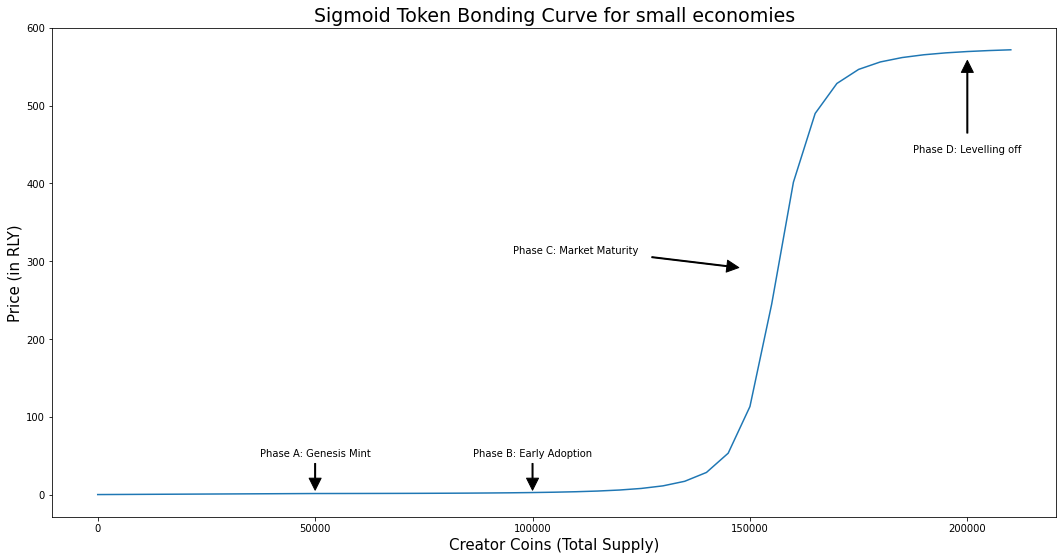

In [50]:
plt.rcParams["figure.figsize"] = (18,9)
plt.title('Sigmoid Token Bonding Curve for small economies',fontsize=19)
plt.plot('x-axis','y-axis',data=slopes)
plt.xlabel('Creator Coins (Total Supply)',fontsize=15)
plt.ylabel('Price (in RLY)',fontsize=15)
plt.annotate('Phase A: Genesis Mint', xy=(50000, 1),  xycoords='data',
            xytext=(50000, 60), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase B: Early Adoption', xy=(100000, 1),  xycoords='data',
            xytext=(100000, 60), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase C: Market Maturity', xy=(150000, 290),  xycoords='data',
            xytext=(110000, 320), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase D: Levelling off', xy=(200000, 570),  xycoords='data',
            xytext=(200000, 450), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)

## Sigmoid Token Bonding Curve (Currently used by Rally) :


The sigmoid curve visible above is the one that is being used for calculating the exchange price of creator coins against RLY.
These pricing curves define the behavior of an automated market maker (AMM) that provides the liquidity to anyone interested in buying or selling a Creator Coin.

**Phase A: Genesis Mint**
    - Upon instantiation, first 50,000 coins are minted with a small amount of locked liquidity which go to the corresponding creator
    
**Phase B: Early Adoption**
    - Slope starts increasing gradually which creates an opportunity for early adopters to acquire a meaningful share of creator coins for a relatively modest price.
    
**Phase C: Market Maturity**
    - Slope increases more significantly which results in volatilie price swings in response to demand which creates opportunities for interesting interactions around Creator Coins and the digital assets (NFTs) they may support.

**Phase D: Levelling off**
    - in segment ‘D’ we arrive at a leveling off of price and eventually hit our effective supply cap of 210,000 coins. 

**The Following mathematical equation describes the Sigmoidal Token Bonding Curve**
<div>
<img src="attachment:Screenshot%202021-03-08%20at%208.08.39%20AM.png" width="400"/>
</div>
Where: <br>
 - a = maximum token price / 2 (height of the curve) <br>
 - b = token supply at the inflection point (when the incentives begin to diminish) <br>
 - c = “steepness” of the curve <br>
 - m = constant which establishes the vertical position

### Bonding Curve Template #1 

- The current levelling off phase puts a hard cap over the total Creator Coins supply while further no visible increase in price dis-incentivizes new potential buyers from participating in the creator economy.
- Further, the levelling off phase, being implemented not much far away from the market maturity phase, can lead to the TBC frequently moving back to the market maturity phase amid market in-decision which may promote speculative behaviour.

_To resolve this issue, we recommend continuing the Token Bonding Curve beyond the levelling off phase based upon a logarithmic curve._

#### Why logarithmic curve?
Logarithmic curves support slow price increases for newly minted creator coins which while supporting a stable economy proovide visible incentives to the market participants to participate in the economy.



In [51]:
newSlopes = slopes.copy()

In [52]:
prev_x = newSlopes.loc[len(newSlopes)-1,'x-axis']
for index in range(len(newSlopes),len(newSlopes)+10):
#     print(index)
    newSlopes.loc[index,'x-axis'] = prev_x + 5000
#     print(newSlopes.loc[index,'x-axis'])
    newSlopes.loc[index,'y-axis'] = newSlopes.loc[index-1,'y-axis']*1.003 #pow(newSlopes.loc[index,'x-axis'] - newSlopes.loc[index-1,'x-axis'],0.00058)
#     print(newSlopes.loc[index,'y-axis'])
    newSlopes.loc[index,'slope'] = newSlopes.loc[index,'y-axis'] / newSlopes.loc[index,'x-axis']
#     print(newSlopes.loc[index,'slope'])
    prev_x = newSlopes.loc[index,'x-axis']

Text(250000, 470, 'Extended Curve: Logarithmic Function')

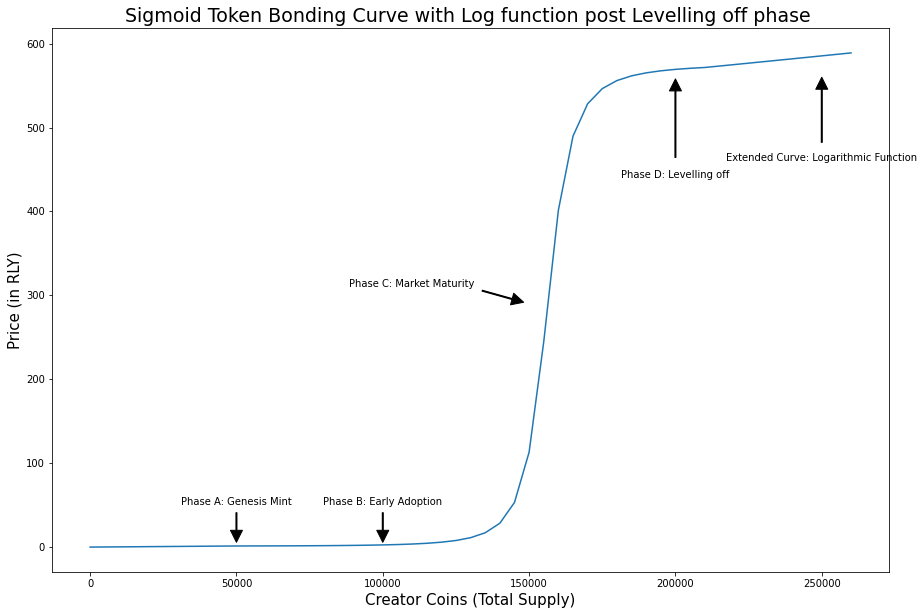

In [53]:
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Sigmoid Token Bonding Curve with Log function post Levelling off phase ',fontsize=19)
plt.plot('x-axis','y-axis',data=newSlopes)
plt.xlabel('Creator Coins (Total Supply)',fontsize=15)
plt.ylabel('Price (in RLY)',fontsize=15)
plt.annotate('Phase A: Genesis Mint', xy=(50000, 1),  xycoords='data',
            xytext=(50000, 60), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase B: Early Adoption', xy=(100000, 1),  xycoords='data',
            xytext=(100000, 60), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase C: Market Maturity', xy=(150000, 290),  xycoords='data',
            xytext=(110000, 320), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase D: Levelling off', xy=(200000, 570),  xycoords='data',
            xytext=(200000, 450), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Extended Curve: Logarithmic Function', xy=(250000, 570),  xycoords='data',
            xytext=(250000, 470), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)

### Bonding Curve Template #2
- The current early adoption phase has too low a slope because of which the next Market maturity phase displays more speculative behaviour as compared to what is expected.

To resolve this issue, we recommend increasing slope of the curve for the early adoption phase.

In [54]:
newSlopes2 = newSlopes.copy()

In [55]:
for index in range(5,22):
    newSlopes2.loc[index,'y-axis'] =  newSlopes2.loc[index,'y-axis']*1.7   

Text(230000, 90, 'Phase B: Early Adoption : INCREASED SLOPE')

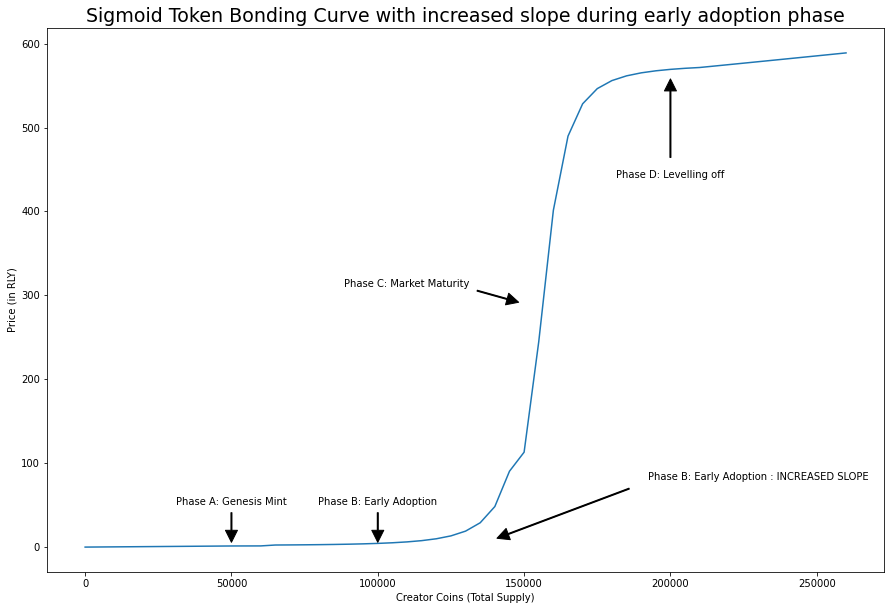

In [56]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot('x-axis','y-axis',data=newSlopes2)
plt.title('Sigmoid Token Bonding Curve with increased slope during early adoption phase',fontsize=19)
plt.xlabel('Creator Coins (Total Supply)')
plt.ylabel('Price (in RLY)')
plt.annotate('Phase A: Genesis Mint', xy=(50000, 1),  xycoords='data',
            xytext=(50000, 60), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase B: Early Adoption', xy=(100000, 1),  xycoords='data',
            xytext=(100000, 60), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase C: Market Maturity', xy=(150000, 290),  xycoords='data',
            xytext=(110000, 320), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase D: Levelling off', xy=(200000, 570),  xycoords='data',
            xytext=(200000, 450), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Phase B: Early Adoption : INCREASED SLOPE', xy=(135000, 3),  xycoords='data',
            xytext=(230000, 90), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)

### Bonding Curve Template #3
- It may be a feasible option to introduce a sell fee (either constant or variable) which will disincentivize spculative behaviour and promote long term user participation.

The sell curve introduced below is has the following main properties - 
- It overlaps with the buy curve during the Phase 1 & phase 2 (Genesis mint and Early adoption)
- A sell fee is charged after the early adoption phase is over which decreases linearly from an initial 30% to 20%

In [57]:
newSlopes_buy = newSlopes.copy()

In [58]:
newSlopes_sell = newSlopes.copy()

In [59]:
for index in range(5,22):
    newSlopes_sell.loc[index,'y-axis'] =  newSlopes_sell.loc[index,'y-axis']/1.4  
    
frac = 0.63
for index in range(22,30):
    newSlopes_sell.loc[index,'y-axis'] =  newSlopes_sell.loc[index,'y-axis']*frac
    frac = frac + 0.039

for index in range(30,45):
    newSlopes_sell.loc[index,'y-axis'] =  newSlopes_sell.loc[index,'y-axis']*0.99

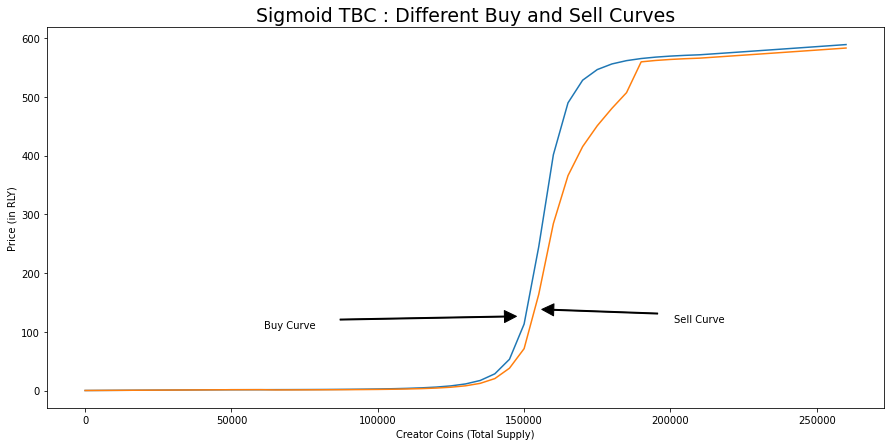

In [60]:
plt.rcParams["figure.figsize"] = (15,7)

plt.plot('x-axis','y-axis',data=newSlopes_buy)
plt.plot('x-axis','y-axis',data=newSlopes_sell)
plt.title('Sigmoid TBC : Different Buy and Sell Curves',fontsize=19)
plt.xlabel('Creator Coins (Total Supply)')
plt.ylabel('Price (in RLY)')
plt.annotate('Buy Curve', xy=(155000, 127),  xycoords='data',
            xytext=(70000,120), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
plt.annotate('Sell Curve', xy=(151000, 139),  xycoords='data',
            xytext=(210000, 130), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.1, width=1),
            horizontalalignment='center', verticalalignment='top',)
# plt.annotate('Sell Fee linearly decreases from 30% to 20% and then stays constant', xy=(150000, 47000),  xycoords='data',
#             xytext=(270000, 49000), textcoords='data', color='red',
#             arrowprops=dict(facecolor='black', shrink=0.1, width=1),
#             horizontalalignment='center', verticalalignment='top',)
plt.savefig("RallyTBC.png")
# print(slopes.head())